# PyQuant News letter on VAR
VaR is one way professional traders manage risk.

It estimates how much your portfolio might lose over a set time period. Using VaR is a good way to avoid losing all your money if the market moves against you.

VaR let’s you say something like this:

"With 95% confidence, my portfolio’s loss will not exceed $750 in one day.

Unfortunately, most non-professional traders don’t use VaR.

They either don’t know it exists or think it’s too complicated to use

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

import yfinance as yf

In [5]:
# create your portfolio of stocks
tickers = ["AAPL", "MSFT", "C", "DIS"]

# pick the weights of each stock (must add to 1)
weights = np.array([0.25, 0.3, 0.15, 0.3])

# the size of the portfolio
portfolio_value = 1_000

# the confidence interval (95%)
confidence = 0.05

In [6]:
data = yf.download(tickers, start="2018-01-01", end="2021-12-31")["Close"]

[*********************100%***********************]  4 of 4 completed


In [7]:
# compute daily returns of each stock
returns = data.pct_change()

# compute the daily mean returns of each stock
mean_returns = returns.mean()

# compute portfolio mean return
port_mean = mean_returns.dot(weights)

# mean of investment returns
investment_mean = (1 + port_mean) * portfolio_value

# compute the portfolio covariance matrix
cov_matrix = returns.cov()

# compute portfolio standard deviation
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))

# standard deviation of investment returns
investment_stdev = portfolio_value * port_stdev

In [8]:
# ppf takes a percentage and returns a standard deviation 
# multiplier for what value that percentage occurs at.
# It is equivalent to a one-tail test on the density plot.
percent_point = norm.ppf(confidence, investment_mean, investment_stdev)

In [9]:
# calculate the VaR at the confidence interval
value_at_risk = portfolio_value - percent_point

# print it out
f"Portfolio VaR: {value_at_risk}"

'Portfolio VaR: 27.75487870066513'

### Bonus: Scaling VaR to different time frames
What about over one week? Or one month?

Stock returns increase with the square root of time.

Therefore to scale the value at risk, we multiply it by the square root of time.

This sounds scary but it’s simple in Python.

Multiply the one-day VaR by the square root of one (day) through the square root of 30 (days).

In [10]:
value_at_risks = value_at_risk * np.sqrt(range(1, 31))

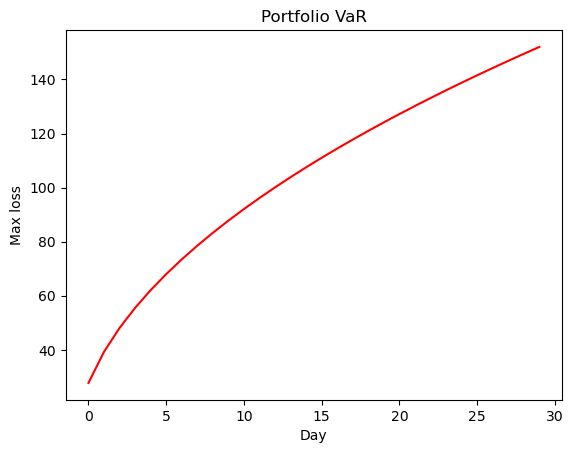

In [12]:
# build plot of VaR over time
plt.xlabel("Day")
plt.ylabel("Max loss")
plt.title("Portfolio VaR")
plt.plot(value_at_risks, "r")